# Analysis of results of experiments for coursework 2

In this notebook, the data gathered for the different experiments is analyzed with plots.

The experiments were run in the command line as follows:

    For baseline systems:

      python cw2_a1.py exp_name model_type

    For different stochastic gradient descent 

      python cw2_a3.py exp_name model_type

    For batch normalization

      python cw2_a7.py exp_name model_type
      
    For convolutional networks
    
      python cw2_b5.py exp_name model_type
      
      
For every experiment exp_name is the name of the experiment (any strine). For neural networks, model_type can be 1 for a single convolutional layer network, or 2 for a two convolutional layers network. For the rest of systems, model_type can be 0 for a model with dropout, 1 for a network with L2 regularization, 2 for a network that uses histogram of gradients as features.

The output of every script is a text file with the statistics for every experiment.

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

## 1. Plots for baseline experiments

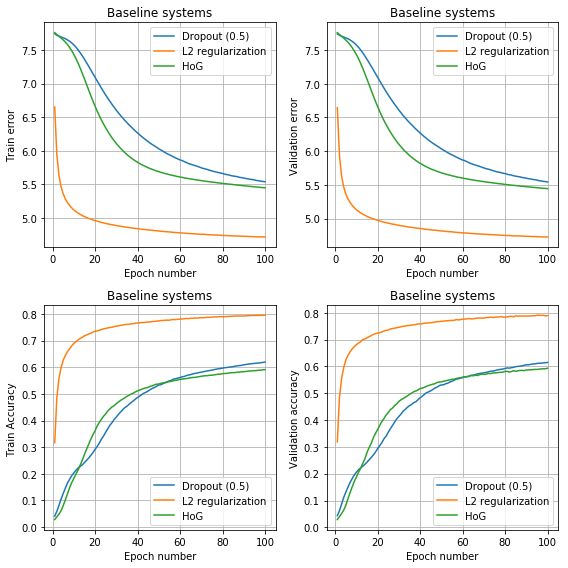

In [42]:
def plot_metrics_baseline(exp_name="exp0"):
    networks = ["dropout", "regularization", "hog"]
    legends = ["Dropout (0.5)", "L2 regularization", "HoG"]
    
    # train err | train acc | val err | val acc | params
    metrics_name = ["Train error", "Train Accuracy ", "Validation error", "Validation accuracy"]

    metrics_list = [OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict()]

    for net in networks:
        file_name = "{:s}_network_{:s}_log.txt".format(exp_name, net)
        net_metrics = np.loadtxt(file_name, delimiter=',', skiprows=2)

        assert len(metrics_list) == net_metrics.shape[1]

        for idx, ml in enumerate(metrics_list):
            ml[net] = net_metrics[:, idx]            

    col = 2
    row = len(metrics_list)
    row /= 2
    row = int(row)
    f, ax = plt.subplots(row, col, figsize=(8, 8))
    c = 0
    for i in range(row):
        for j in range(col):
            a = ax[j, i]
            for leg, net in zip(legends, networks):
                ml = metrics_list[c]
                a.plot(np.arange(1, len(ml[net])), ml[net][1:], label=leg)

            a.legend(loc=0)
            a.set_xlabel("Epoch number")
            a.set_ylabel(metrics_name[c])
            a.set_title("Baseline systems")
            a.grid()

            c += 1
    
    f.tight_layout()
    f.savefig("{:s}_metrics.svg".format(exp_name), dpi=200)

plot_metrics_baseline()


## 2. Plots for learning rules

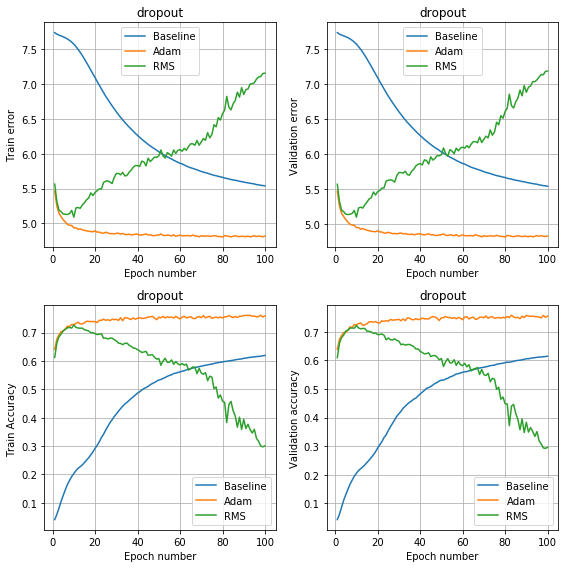

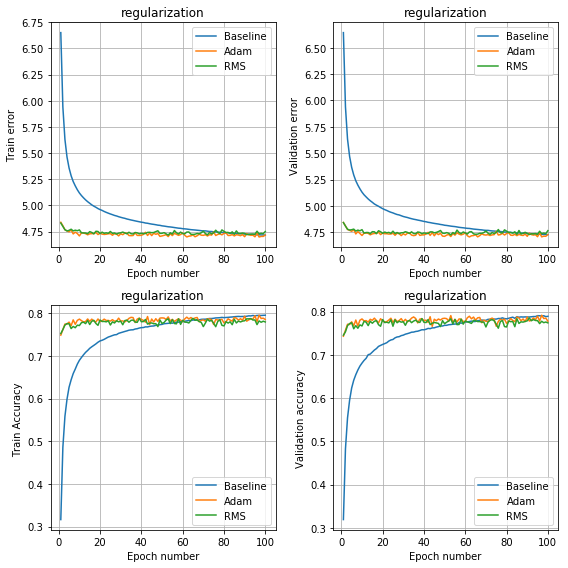

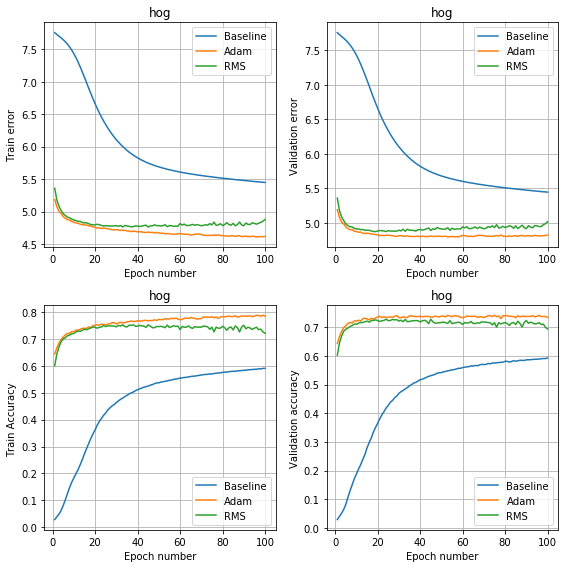

In [45]:
def plot_metric_learning_rules(exp_name):
    learning_rules = ["", "AdamLearningRule", "RMSPropRule"]
    learning_tags = ["Baseline", "Adam", "RMS"]
    
    networks = ["dropout", "regularization", "hog"]
    legends = ["Dropout (0.5)", "L2 regularization", "HoG"]
    
    # train err | train acc | val err | val acc | params
    metrics_name = ["Train error", "Train Accuracy ", "Validation error", "Validation accuracy"]

    for net in networks:
        
        metrics_list = [OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict()]

        for rule in learning_rules:
            file_name = "{:s}_network_{:s}_{:s}_log.txt".format(exp_name, net, rule)
            rule_metrics = np.loadtxt(file_name, delimiter=',', skiprows=2)

            assert len(metrics_list) == rule_metrics.shape[1]

            for idx, ml in enumerate(metrics_list):
                ml[rule] = rule_metrics[:, idx]
                
        col = 2
        row = len(metrics_list)
        row /= 2
        row = int(row)
        f, ax = plt.subplots(row, col, figsize=(8, 8))
        c = 0
        for i in range(row):
            for j in range(col):
                a = ax[j, i]
                for tag, rule in zip(learning_tags, learning_rules):
                    ml = metrics_list[c]
                    a.plot(np.arange(1, len(ml[rule])), ml[rule][1:], label=tag)

                a.legend(loc=0)
                a.set_xlabel("Epoch number")
                a.set_ylabel(metrics_name[c])
                a.set_title(net)
                a.grid()

                c += 1

        f.tight_layout()
        f.savefig("{:s}_{:s}_metrics.svg".format(exp_name, net), dpi=200)

plot_metric_learning_rules("exp1")